In [1]:
#Preprocessing an image using OpenCV or text OCR
import cv2
import matplotlib.pyplot as plt
from PIL import Image



In [2]:
imgage_file = Image.open("/Users/rajataggarwal/Desktop/simplee.png") #Loads image for pillow.Image
#Now, we gotta load image for opencv to make it accessible to the lib
img = cv2.imread("/Users/rajataggarwal/Desktop/simplee.png")

print(img) #prints array of pixels 
type(img) #tells what kind of image it is . Result tells us that it is n dimensional array


[[[233 231 230]
  [233 231 230]
  [233 231 230]
  ...
  [233 231 230]
  [233 231 230]
  [233 231 230]]

 [[233 231 230]
  [233 231 230]
  [233 231 230]
  ...
  [233 231 230]
  [233 231 230]
  [233 231 230]]

 [[233 231 230]
  [233 231 230]
  [233 231 230]
  ...
  [233 231 230]
  [233 231 230]
  [233 231 230]]

 ...

 [[233 231 230]
  [233 231 230]
  [233 231 230]
  ...
  [233 231 230]
  [233 231 230]
  [233 231 230]]

 [[233 231 230]
  [233 231 230]
  [233 231 230]
  ...
  [233 231 230]
  [233 231 230]
  [233 231 230]]

 [[233 231 230]
  [233 231 230]
  [233 231 230]
  ...
  [233 231 230]
  [233 231 230]
  [233 231 230]]]


numpy.ndarray

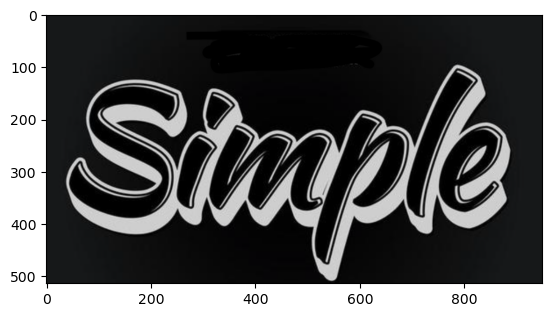

In [3]:
#Inverting an image i.e black becomes white, white becomes black

inverted_img=cv2.bitwise_not(img) #bitwise_not is a function that inverts the image i.e 0 to 1 and 1 to 0.
# inverted_img.save("/Users/rajataggarwal/Desktop/inverted.png") #saves the inverted image this won't work coz numpy.ndarray object has no attribute save
cv2.imwrite("/Users/rajataggarwal/Desktop/inverted.png",inverted_img) #saves the inverted_image at path mentioned in ""
#similarly we can't simply use imag.show() to display the image, we have to use matplotlib to display the image
plt.imshow(img) # for img as img is also in numpy.ndarray format
plt.imshow(inverted_img) # for inverted_img as inverted_img is also in numpy.ndarray format

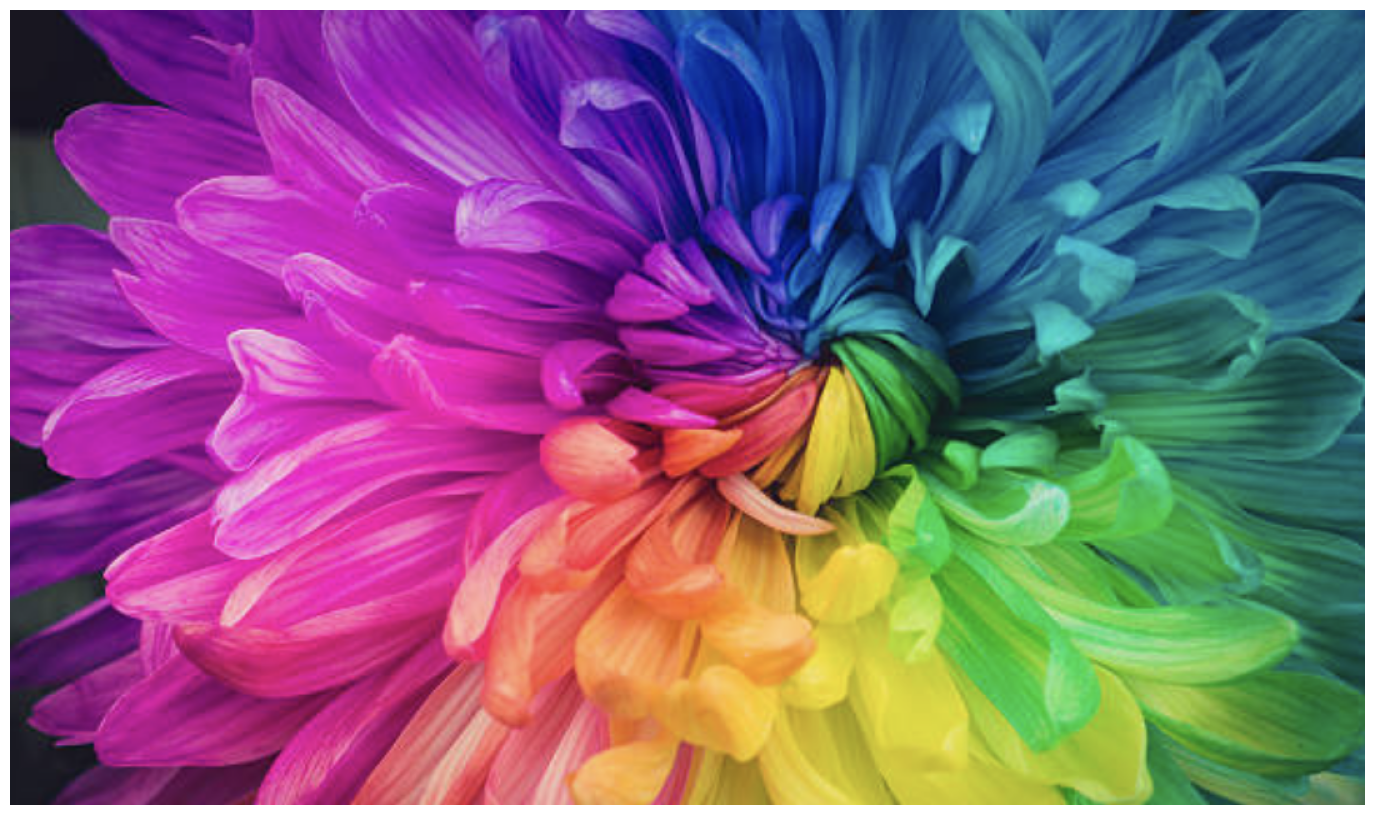

In [4]:
#Also, we can make a display function, where we can pass the image path and it will display the image such that
#it won't have any axis, and all image would be of same size.
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    height,width = im_data.shape[:2]
    figsize = width / float(dpi), height / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(im_data,cmap='gray')
    plt.show()
display("/Users/rajataggarwal/Desktop/colored.png")

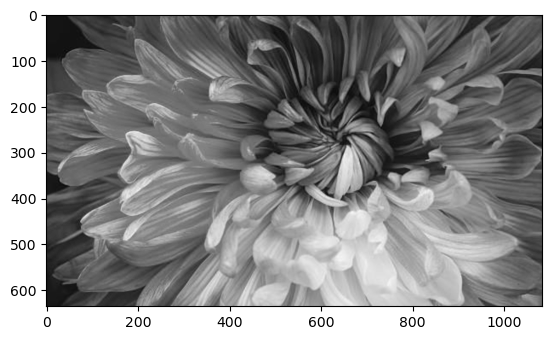

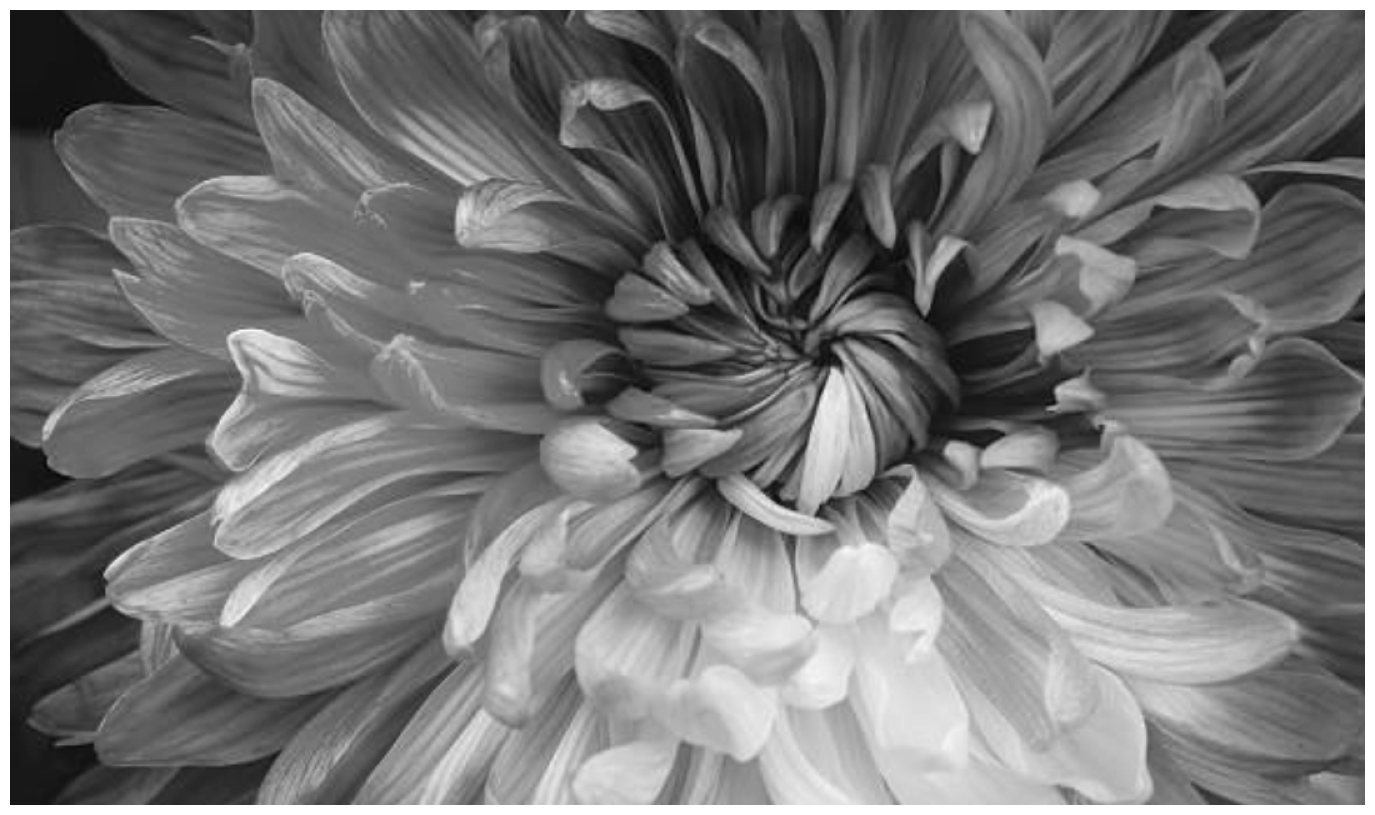

In [6]:
#Binarization of an image i.e converting colored image to a black and white format
image1= Image.open("/Users/rajataggarwal/Desktop/colored.png")
img1= cv2.imread("/Users/rajataggarwal/Desktop/colored.png")
plt.imshow(img1) #is a colored image

# first we will convert this colored image to a grayscale image. But since a lot of images will be converted to grayscale, we will make a function for it
def grayscale_img(x):
    return cv2.cvtColor(x,cv2.COLOR_BGR2GRAY) # converts img image from BGR to grayscale

gray_img = grayscale_img(img1)
plt.imshow(gray_img) #displays the yellowish-greenish image as matplot lib uses it by default
plt.imshow(gray_img,cmap='gray') #cmap='gray' is used to display the image in

#since this diaply function i created takes the image path as input, we can use it to display the grayscale image after we have save the image, and then use the path
gray_image= cv2.imwrite("/Users/rajataggarwal/Desktop/gray.png",gray_img) #saves gray_img as gray.png
display("/Users/rajataggarwal/Desktop/gray.png")


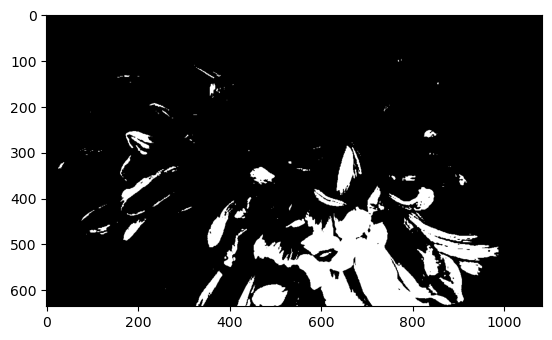

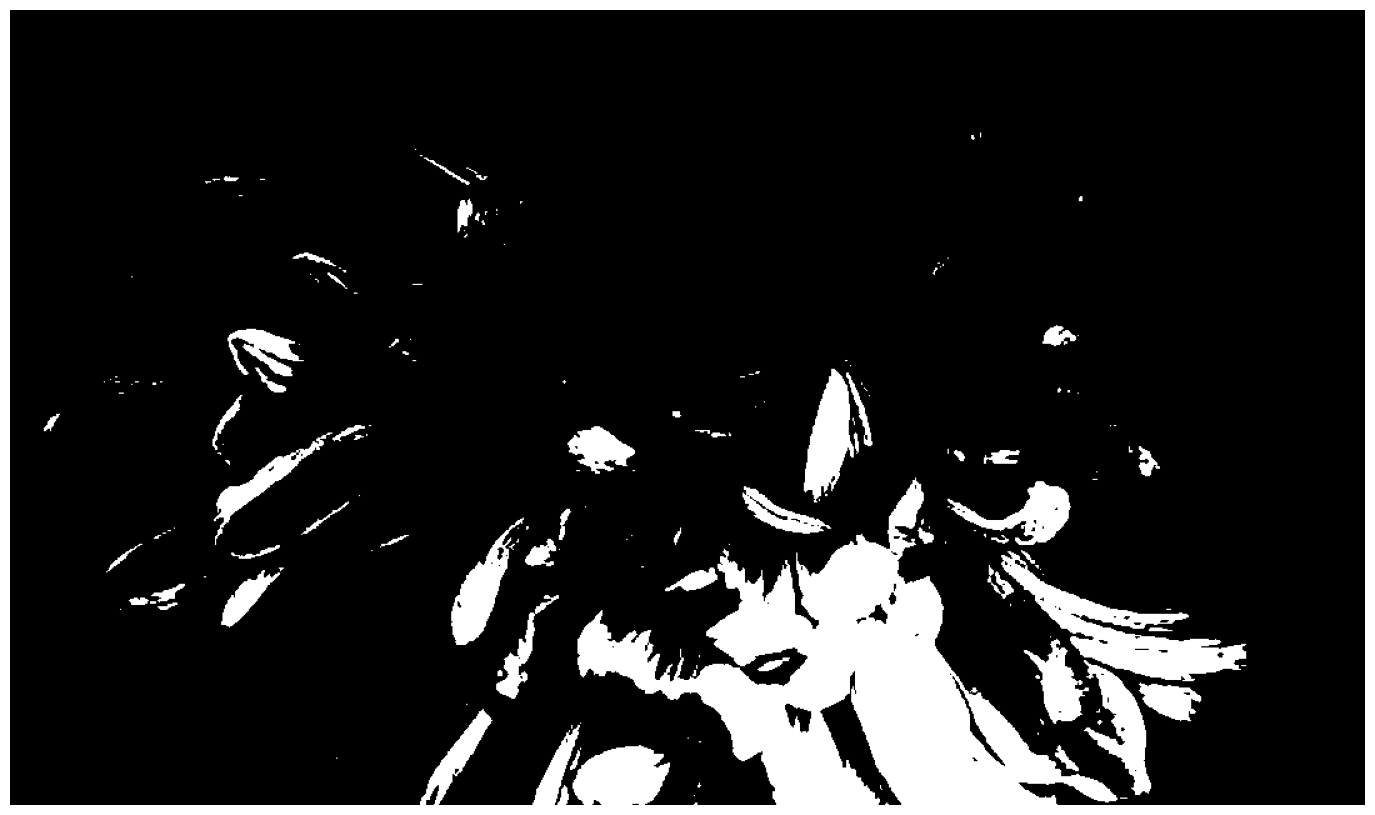

In [ ]:
#Since now, we have the grayscale image, we will continue to binarize the image
thresh, hehe= cv2.threshold(gray_img, 170, 190, cv2.THRESH_BINARY) # Pixels with values greater than 170 will be set to the maximum value (190), and those less than or equal to 170 will be set to 0 (black).
#cv2.threshold() returns a tuple (threshold value, binary image)
plt.imshow(hehe, cmap='gray')
cv2.imwrite("/Users/rajataggarwal/Desktop/binarized.png",hehe)
display("/Users/rajataggarwal/Desktop/binarized.png")

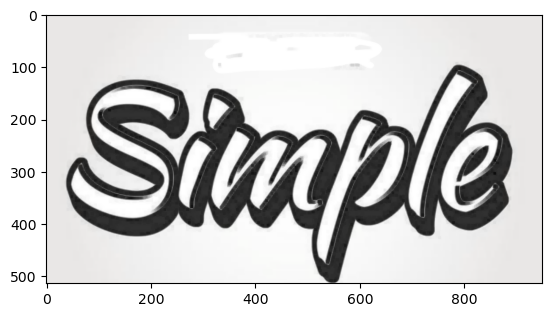

In [8]:
#Erosion(removes white noise- thinning the font size) and Dilation(removes black noise- thickening the font size)
 #We need to invert becuase functions generally work with black background and white foreground/text
#kernal=convolution matrix=mask https://www.youtube.com/watch?v=CgqDtWoCa4g this video explained it well
#kernel allows us to refine edges, image sharpening, blurring, edge detection.
image= Image.open("/Users/rajataggarwal/Desktop/simplee.png")
img= cv2.imread("/Users/rajataggarwal/Desktop/simplee.png")

def ero(y):
    import numpy as np
    y= cv2.bitwise_not(y)
    kernel = np.ones((2,2), np.uint8) # 2 by 2 kernal(matrix) filled with ones. and np.unit8 means 8 bit integer values possible for elements in kernel so 0-255
    #similarly np.full((2,2),np.unit8) would create 2 by 2 kernel filled with 255, while values possible being 0-255
    #kernal is used to modify local parts of an image in specific ways, such as shrinking or expanding objects by passing itself through the image pixels and changing the center value based on what we want to do
    y= cv2.erode(y,kernel, iterations=5) #  The iterations=1 parameter indicates that the erosion is performed once.
    y= cv2.bitwise_not(y) # coverting it back to original form
    return(y)
#this fn is only thinning the font size

eroded_image= ero(img)
plt.imshow(eroded_image)

#dilation, all same as erosion but just instead of erode, we did dilate
def dil(y):
    import numpy as np
    y= cv2.bitwise_not(y)
    kernel = np.ones((2,2), np.uint8)
    y= cv2.dilate(y,kernel, iterations=4)
    y= cv2.bitwise_not(y)
    return(y)
dilated_image= dil(img)
plt.imshow(dilated_image)

